<a href="https://colab.research.google.com/github/woodskd24/MS_DS_Capstone/blob/main/OfficialCapstone_KelseyWoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gastric Sleeve Weight Loss: A Timeseries Analysis Self-Case Study

**Hypothesis**


*   Null Hypothesis (H0): There is no significant change in average weight loss in myself following a standard diet and exercise program prescribed by my registered dietician following gastric sleeve surgery
*   Alternative Hypothesis (H1): There is a significant difference in average
weight loss in myself following a standard diet and exercise program prescribed by my registered dietician following gastric sleeve surgery.



##Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


##Cleaning

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MS Data Science Courses/CS 668 Capstone/Final Data/WeightData_Official11_6.csv")

In [ ]:
print(df.isnull().sum())

print(df.describe())

Date                             0
Weight                           0
Height (in)                      0
Yesterday Weight Loss            0
Weight Loss Total PostOp         0
Weight Loss Total Since PreOp    0
BMI                              0
BMI Class                        0
Bust                             0
Hip                              0
Waist                            0
Protein Intake                   0
Exercise                         0
Diet Stage                       0
dtype: int64
           Weight  Height (in)  Yesterday Weight Loss  \
count   74.000000         74.0              74.000000   
mean   237.413514         67.0               0.405405   
std      7.270344          0.0               0.860534   
min    228.200000         67.0              -1.000000   
25%    233.100000         67.0              -0.100000   
50%    234.700000         67.0               0.200000   
75%    240.150000         67.0               0.700000   
max    258.600000         67.0           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           74 non-null     object 
 1   Weight                         74 non-null     float64
 2   Height (in)                    74 non-null     int64  
 3   Yesterday Weight Loss          74 non-null     float64
 4   Weight Loss Total PostOp       74 non-null     float64
 5   Weight Loss Total Since PreOp  74 non-null     float64
 6   BMI                            74 non-null     float64
 7   BMI Class                      74 non-null     object 
 8   Bust                           74 non-null     float64
 9   Hip                            74 non-null     float64
 10  Waist                          74 non-null     float64
 11  Protein Intake                 74 non-null     int64  
 12  Exercise                       74 non-null     objec

##EDA (Exploratory Data Analysis)

In [ ]:
report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=True
)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Time Series

In [ ]:
!pip install prophet
import prophet as Prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
data = df[["Date", "Weight"]]

# Set "Date" as the index
data.set_index('Date', inplace=True)

# Display the first 5 rows of the new DataFrame
print(data.head(5))


            Weight
Date              
2023-08-25   258.6
2023-08-26   258.0
2023-08-27   256.8
2023-08-28   255.0
2023-08-29   254.3


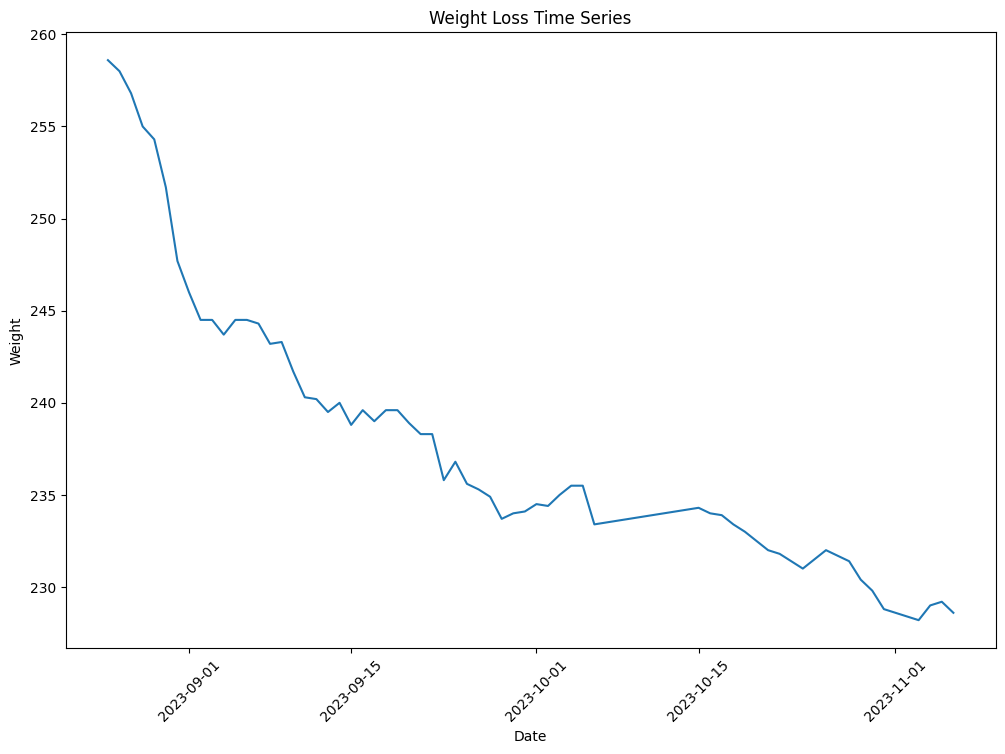

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data['Weight'])
plt.title("Weight Loss Time Series")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['Weight'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Weight'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -3.467692140999416
p-value: 0.008856646478535898


The evidence against the null hypothesis is strong, and I would typically reject the null hypothesis in favor of the alternative hypothesis. In other words, I would conclude that there is a statistically significant effect or relationship in my weight data.

The small p-value (0.008856646478535898) suggests that there is evidence to reject the null hypothesis of non-stationarity, and the negative ADF Statistic provides additional support for stationarity. Therefore, the evidence suggests that the time series data is stationary.

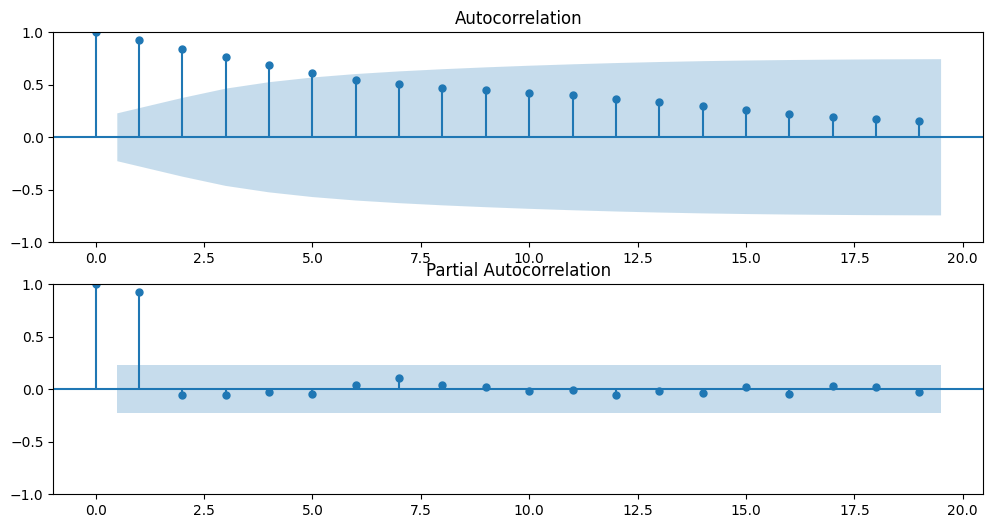

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(data['Weight'], ax=ax1)
plot_pacf(data['Weight'], ax=ax2)
plt.show()


In [ ]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(data['Weight'], order=(1,1,1))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.7)  # 70% for training, 30% for testing
train_data, test_data = data[:train_size], data[train_size:]

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the testing data
predictions = result.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 3.5379962587860296


In [ ]:
forecast_steps = 30  # Change this to the number of steps you want to forecast
future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)

Future Forecast: 2023-11-07    228.501913
2023-11-08    228.414008
2023-11-09    228.335228
2023-11-10    228.264626
2023-11-11    228.201352
2023-11-12    228.144646
2023-11-13    228.093827
2023-11-14    228.048283
2023-11-15    228.007466
2023-11-16    227.970887
2023-11-17    227.938104
2023-11-18    227.908725
2023-11-19    227.882395
2023-11-20    227.858798
2023-11-21    227.837651
2023-11-22    227.818699
2023-11-23    227.801714
2023-11-24    227.786492
2023-11-25    227.772850
2023-11-26    227.760625
2023-11-27    227.749668
2023-11-28    227.739849
2023-11-29    227.731049
2023-11-30    227.723163
2023-12-01    227.716095
2023-12-02    227.709761
2023-12-03    227.704084
2023-12-04    227.698996
2023-12-05    227.694437
2023-12-06    227.690351
Freq: D, Name: predicted_mean, dtype: float64


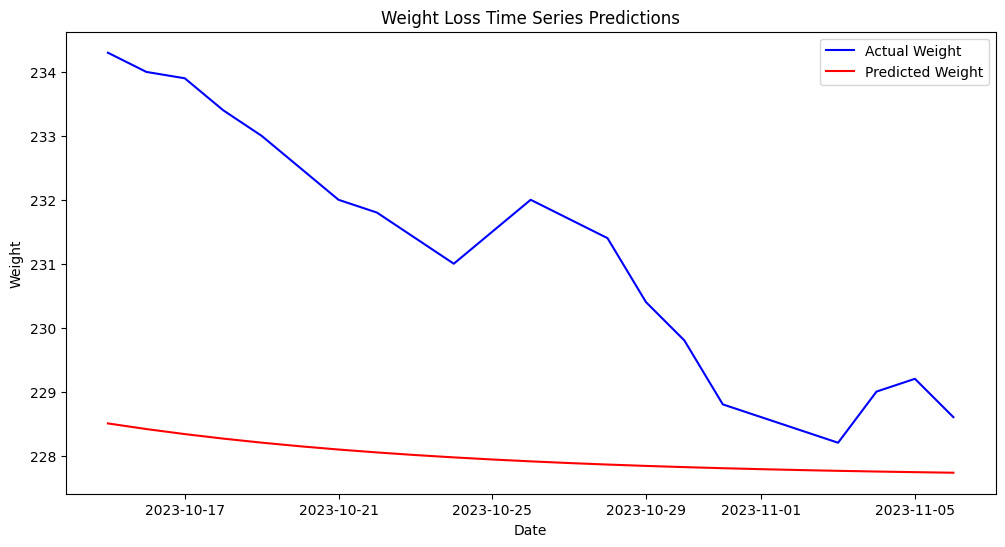

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual weight data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Weight'], label='Actual Weight', color='blue')

# Plot the predicted weight data
plt.plot(test_data.index, predictions, label='Predicted Weight', color='red')

plt.title("Weight Loss Time Series Predictions")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


Future Forecast: 2023-11-07    228.501913
2023-11-08    228.414008
2023-11-09    228.335228
2023-11-10    228.264626
2023-11-11    228.201352
2023-11-12    228.144646
2023-11-13    228.093827
2023-11-14    228.048283
2023-11-15    228.007466
2023-11-16    227.970887
2023-11-17    227.938104
2023-11-18    227.908725
2023-11-19    227.882395
2023-11-20    227.858798
2023-11-21    227.837651
2023-11-22    227.818699
2023-11-23    227.801714
2023-11-24    227.786492
2023-11-25    227.772850
2023-11-26    227.760625
2023-11-27    227.749668
2023-11-28    227.739849
2023-11-29    227.731049
2023-11-30    227.723163
2023-12-01    227.716095
2023-12-02    227.709761
2023-12-03    227.704084
2023-12-04    227.698996
2023-12-05    227.694437
2023-12-06    227.690351
2023-12-07    227.686689
2023-12-08    227.683407
2023-12-09    227.680466
2023-12-10    227.677830
2023-12-11    227.675468
2023-12-12    227.673351
2023-12-13    227.671454
2023-12-14    227.669754
2023-12-15    227.668230
2023-12-

<ipython-input-107-3be764fbdab5>:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')


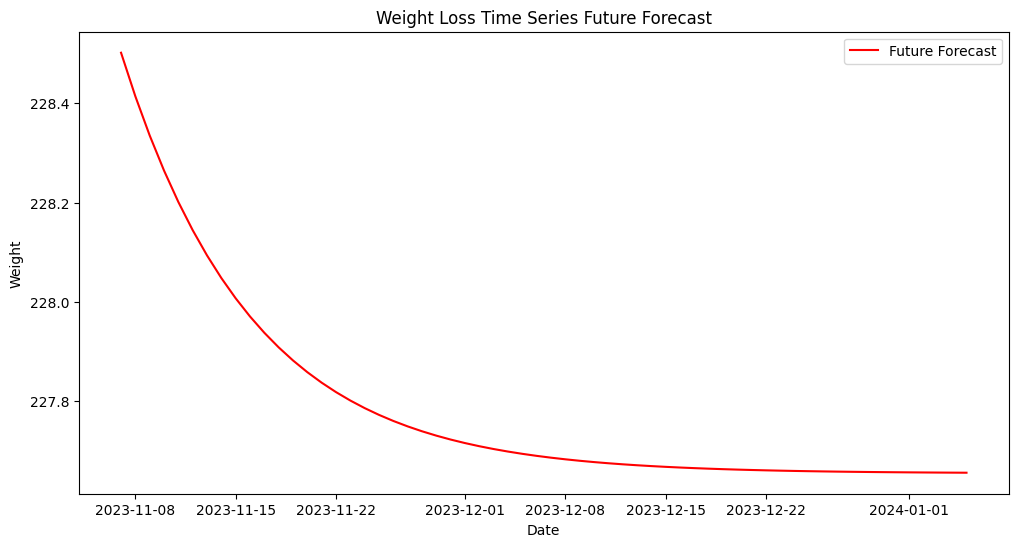

In [ ]:
# Define the number of steps to forecast into the future
forecast_steps = 60  # Change this to the number of steps you want to forecast

# Forecast future values
future_forecast = result.forecast(steps=forecast_steps)
print("Future Forecast:", future_forecast)

# Create a date range for the future forecast
last_date = data.index[-1]
date_range = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')

# Plot the future forecast
plt.figure(figsize=(12, 6))
plt.plot(future_forecast, label='Future Forecast', color='red')

plt.title("Weight Loss Time Series Future Forecast")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.show()


##Cross Validation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
def arima_cross_validation(data, order, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = []

    for train_index, test_index in tscv.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        model = sm.tsa.arima.ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        scores.append(mse)

    return scores

In [ ]:
p, d, q = (1, 1, 1)  # Replace with your chosen ARIMA order
scores = arima_cross_validation(data, order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
average_mse = np.mean(scores)
print(f'Average Mean Squared Error: {average_mse}')

Average Mean Squared Error: 8.41624144887712


The average MSE of 7.68 implies that, on average, my model's daily weight predictions are off by about 7.68 square pounds